In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('../csv-archivos/datos_sql.csv', index_col=0)
df

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_current_manager,date_birth,remote_work,grupo
0,False,NaN,684.0,NaN,6,3,NaN,162.0,1.0,m,...,0,NaN,5,3.0,20,15,15,1972,True,control
1,False,NaN,699.0,NaN,1,4,life sciences,259.0,3.0,m,...,1,34.0,5,3.0,33,11,9,1971,True,control
2,False,rarely,532.0,research & development,4,2,technical degree,319.0,3.0,m,...,0,22.0,3,NaN,22,11,15,1981,True,control
3,False,rarely,359.0,NaN,2,4,medical,NaN,1.0,f,...,2,NaN,2,NaN,20,5,6,1976,False,control
4,False,NaN,1319.0,NaN,3,3,technical degree,NaN,1.0,f,...,1,NaN,5,3.0,19,2,8,1977,False,variante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,False,NaN,498.0,NaN,3,4,medical,966.0,3.0,f,...,1,8.0,2,4.0,8,6,3,1991,True,variante
1610,False,no,805.0,NaN,4,2,NaN,972.0,3.0,m,...,0,NaN,5,2.0,9,0,8,1978,True,variante
1611,False,rarely,903.0,NaN,13,5,NaN,NaN,NaN,m,...,0,9.0,3,3.0,8,0,7,1984,True,control
1612,False,no,1229.0,NaN,8,4,technical degree,990.0,1.0,m,...,2,12.0,3,3.0,7,0,7,1987,NaN,control


## Análisis sobre satisfacción de los empleados

In [5]:
#grupos demográficos para el análisis
mujeres = df[df['gender'] == 'f']
hombres = df[df['gender'] == 'm']

empleados = df[df['attrition'] == False]
antiguos_empleados = df[df['attrition'] == True]

mayor40 = df[df['date_birth'] >= 1984]
menor40 = df[df['date_birth'] < 1984]

In [4]:
#valores necesarios que usaremos en los gráficos de satisfacción

mapeo_satisfaccion = {1: 'Nada satisfecho', 2: 'Poco satisfecho', 3: 'Satisfecho', 4: 'Muy satisfecho'}
valores_ordenados = ['Nada satisfecho', 'Poco satisfecho', 'Satisfecho', 'Muy satisfecho']
colores = ['#FF0000', '#FFCCCC', '#99FF99','#008000']

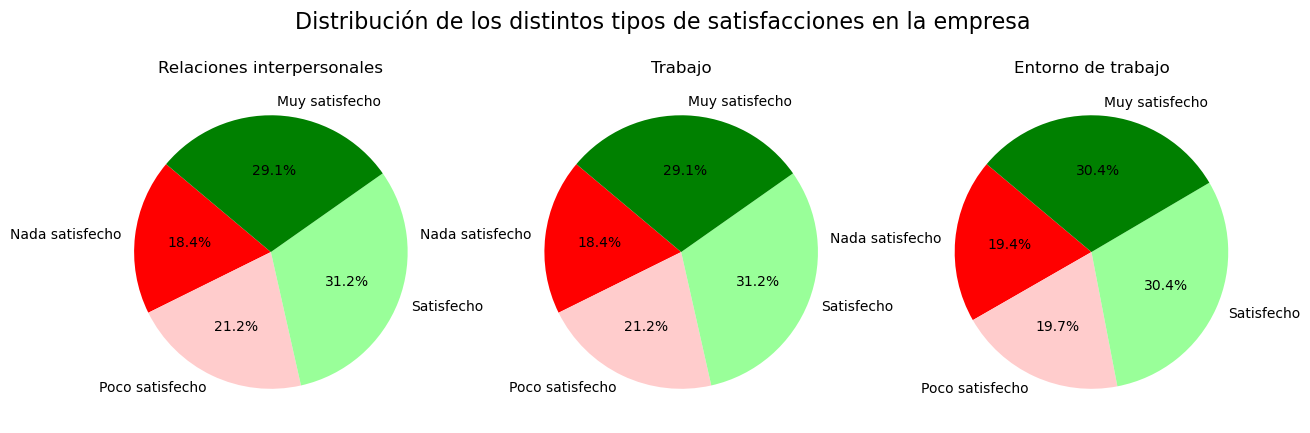

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución de los distintos tipos de satisfacciones en la empresa', fontsize=16)

graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Relaciones interpersonales')

graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Trabajo')


graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Entorno de trabajo');

#### Relaciones interpersonales

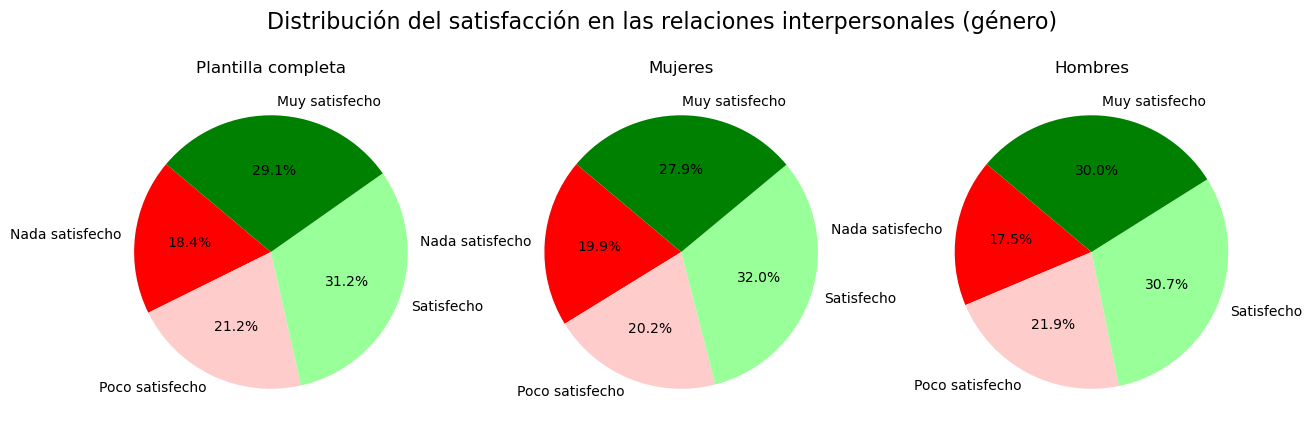

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (género)', fontsize=16)


graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = mujeres['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

graph = hombres['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');

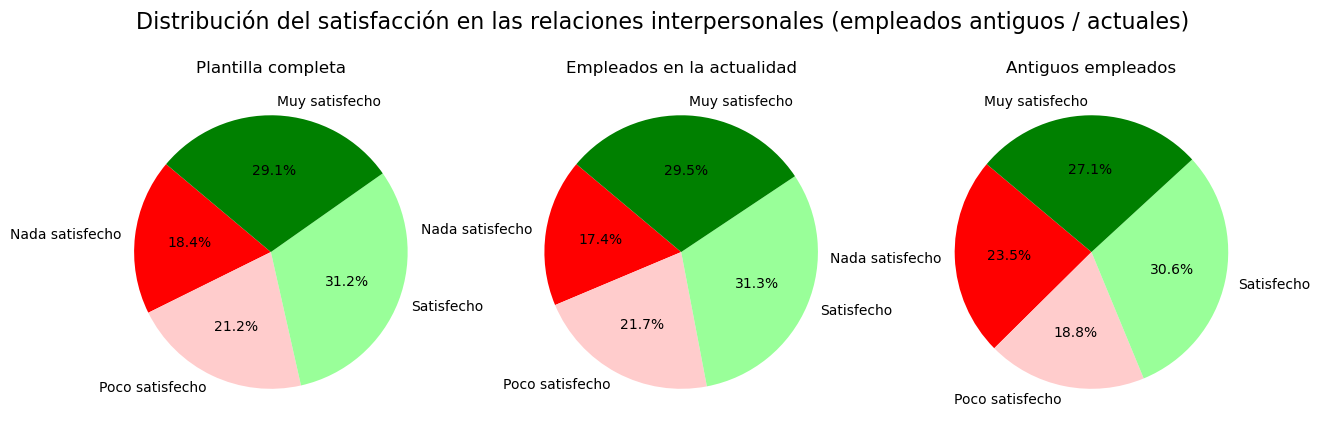

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (empleados antiguos / actuales)', fontsize=16)

graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = empleados['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

graph = antiguos_empleados['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

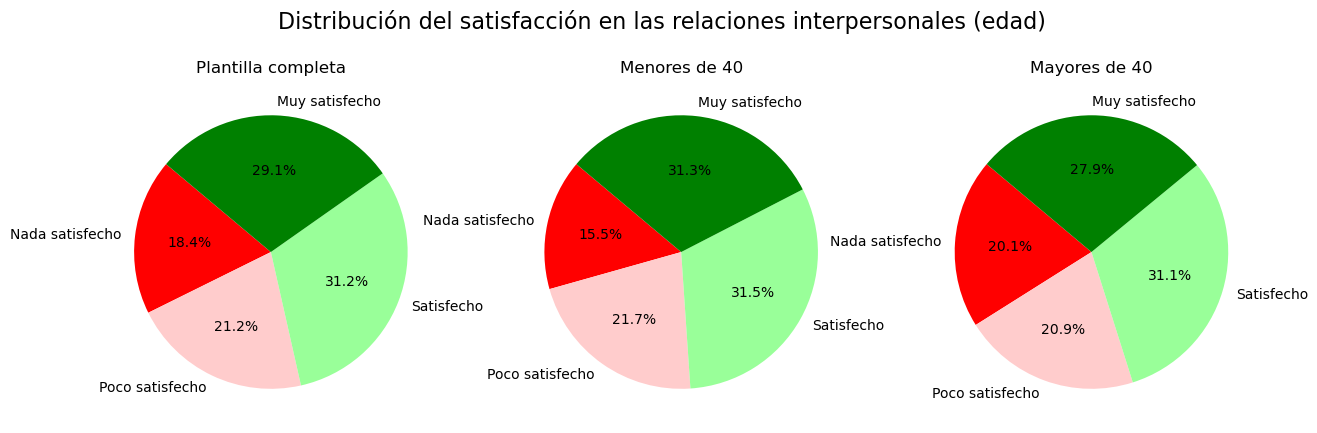

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del satisfacción en las relaciones interpersonales (edad)', fontsize=16)

graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = menor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

graph = mayor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

#### Satisfaccion con el trabajo

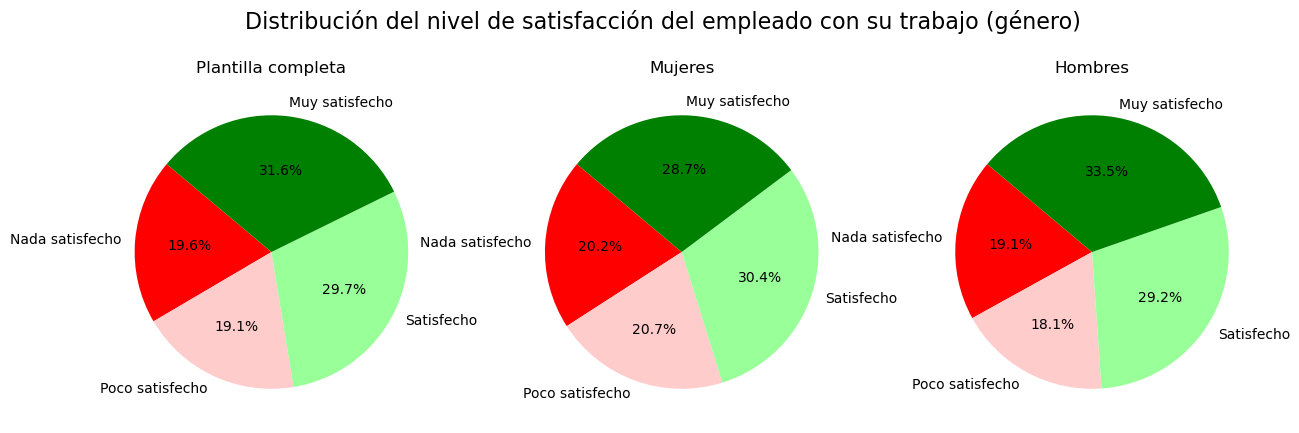

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (género)', fontsize=16)

graph = df['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = mujeres['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

graph = hombres['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');

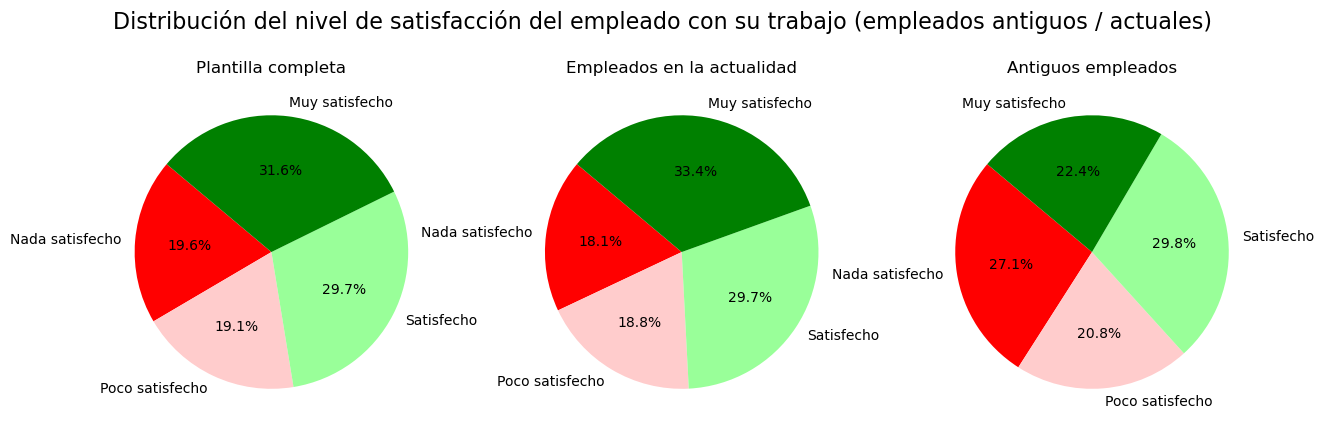

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (empleados antiguos / actuales)', fontsize=16)

graph = df['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = empleados['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

graph = antiguos_empleados['job_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

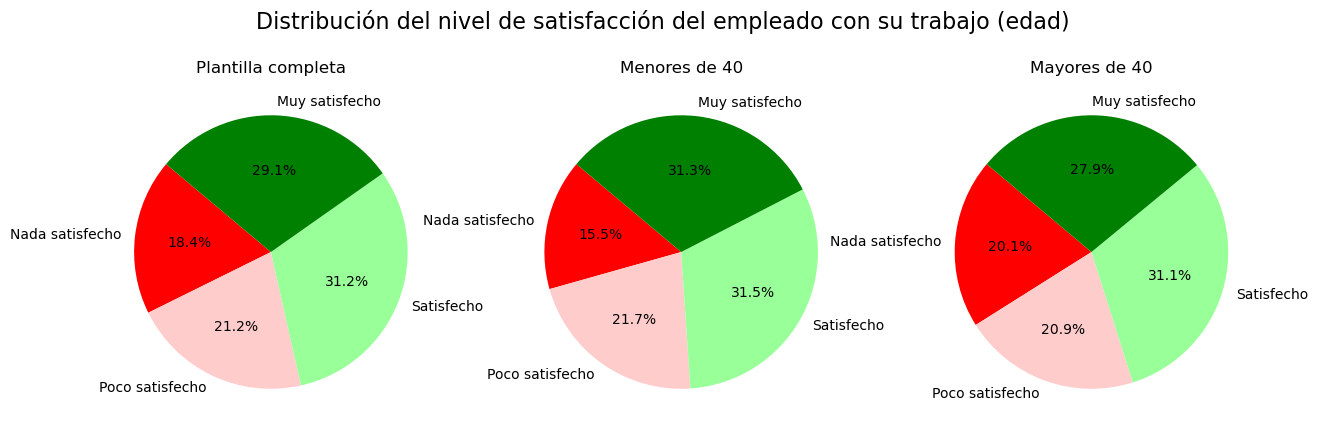

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel de satisfacción del empleado con su trabajo (edad)', fontsize=16)

graph = df['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = menor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

graph = mayor40['relationship_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

#### Entorno de trabajo

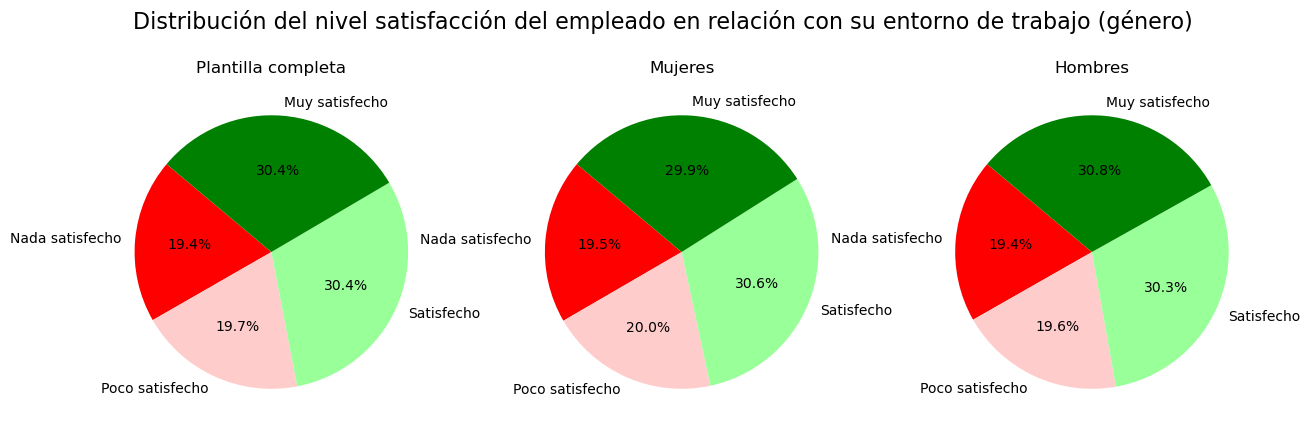

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (género)', fontsize=16)

graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = mujeres['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Mujeres')

graph = hombres['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Hombres');

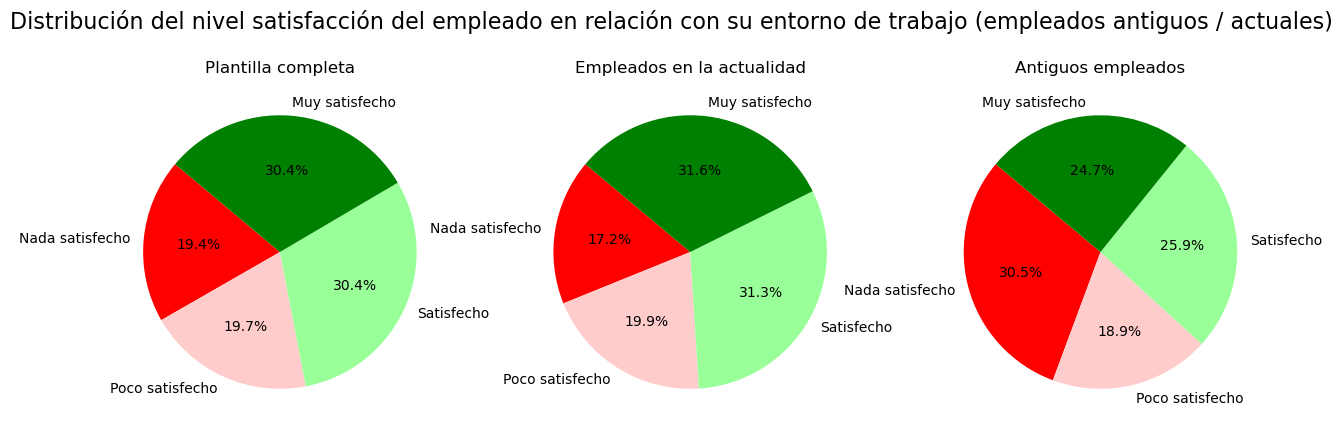

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (empleados antiguos / actuales)', fontsize=16)

graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = empleados['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Empleados en la actualidad')

graph = antiguos_empleados['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Antiguos empleados');

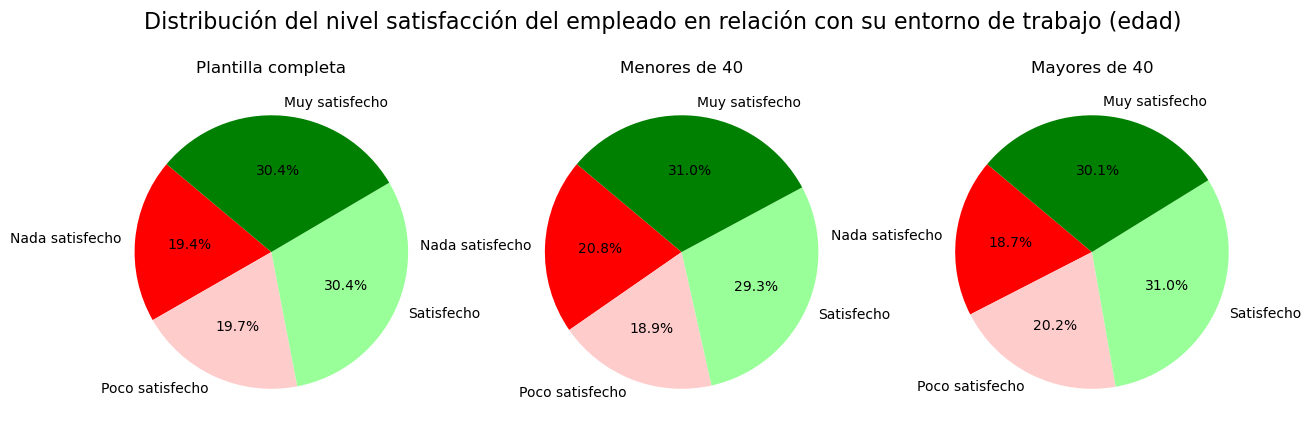

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución del nivel satisfacción del empleado en relación con su entorno de trabajo (edad)', fontsize=16)

graph = df['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[0].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[0].set_title('Plantilla completa')

graph = menor40['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[1].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[1].set_title('Menores de 40')

graph = mayor40['environment_satisfaction'].map(mapeo_satisfaccion).value_counts(normalize=True) * 100
graph = graph.reindex(valores_ordenados)
axs[2].pie(graph, labels=graph.index, autopct='%1.1f%%', startangle=140, colors=colores)
axs[2].set_title('Mayores de 40');

#### Análisis relacionado con el salario

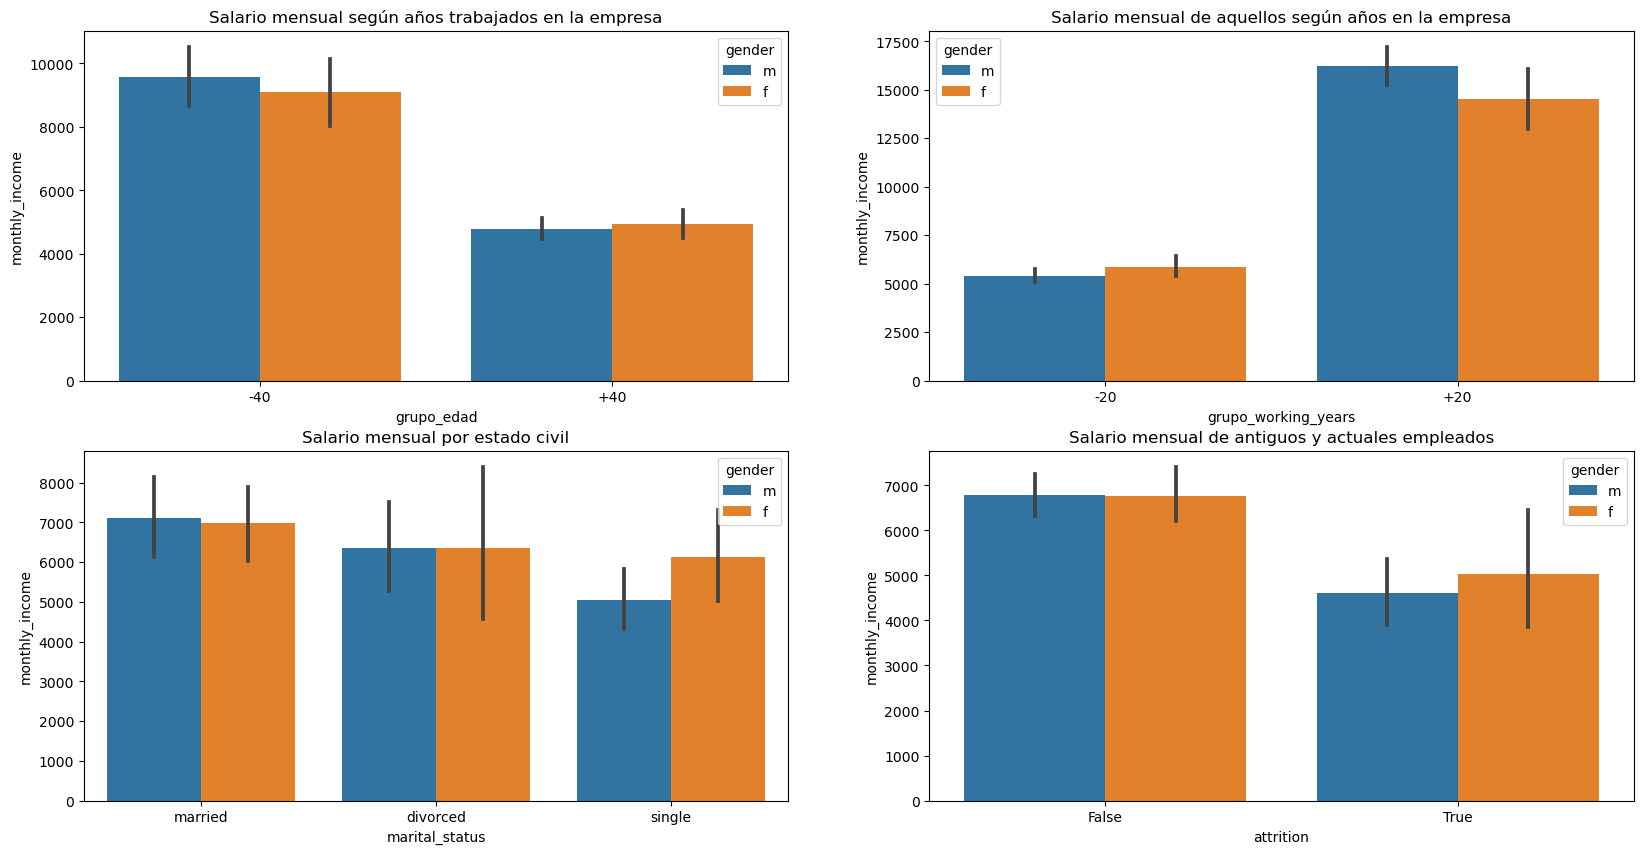

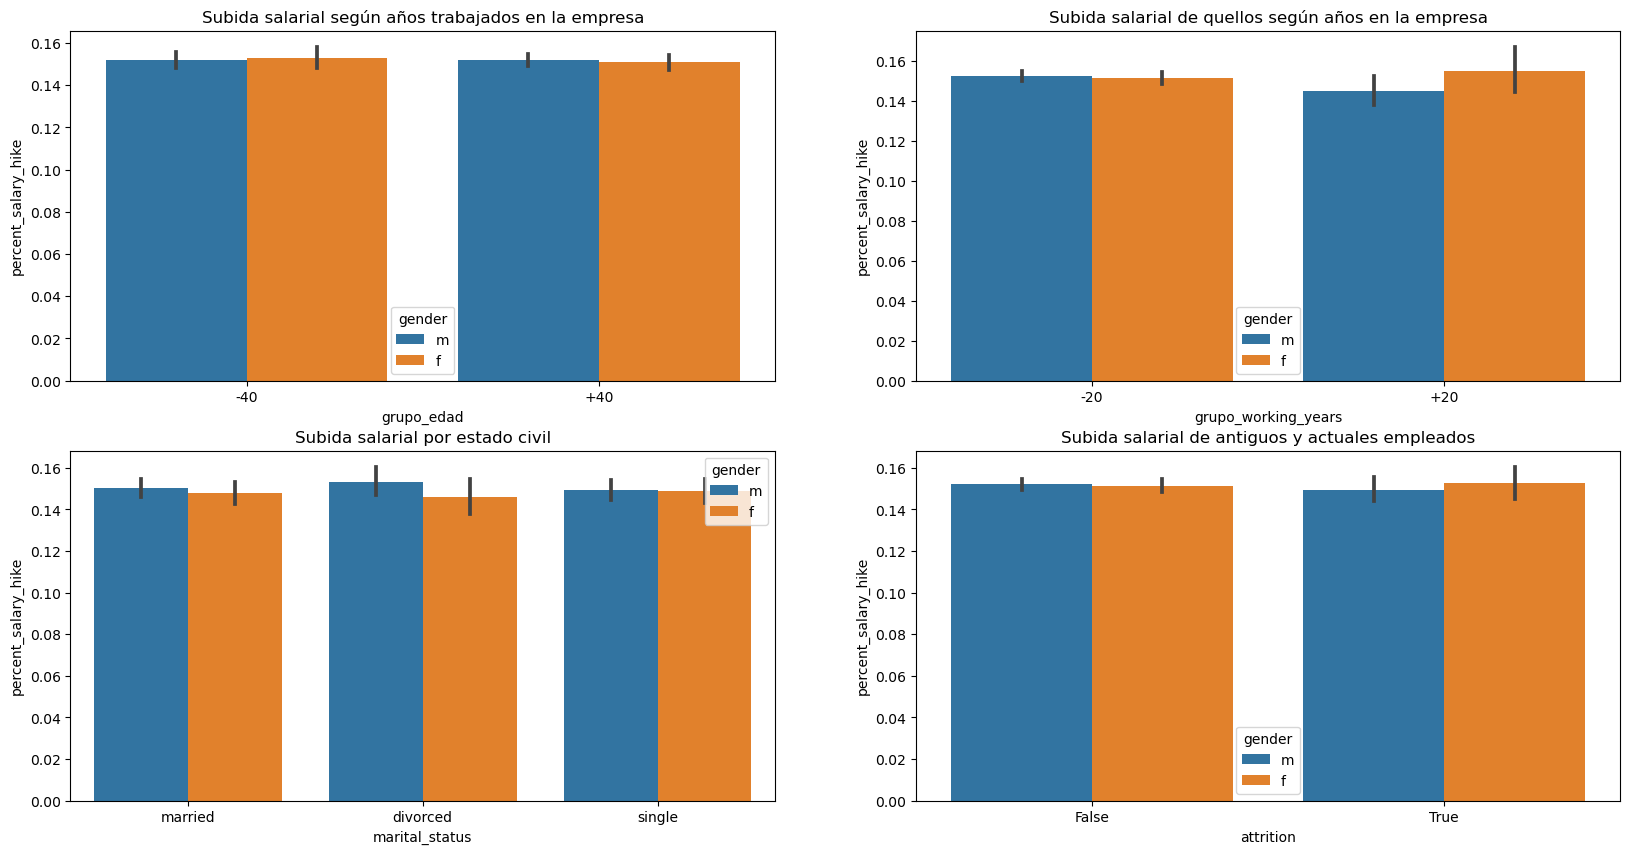

In [19]:
df2 = df.copy()
df2['grupo_edad'] = df['date_birth'].apply(lambda x: '+40' if x > 1983 else '-40')
df2['grupo_working_years'] = df['total_working_years'].apply(lambda x: '+20' if x > 20 else '-20')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
sns.barplot(x='grupo_edad', hue='gender', y='monthly_income', data=df2, ax=axes[0][0])
sns.barplot(x='grupo_working_years', hue='gender', y='monthly_income', data=df2, ax=axes[0][1])
sns.barplot(x='marital_status', hue='gender', y='monthly_income', data=df2, ax=axes[1][0])
sns.barplot(x='attrition', hue='gender', y='monthly_income', data=df2, ax=axes[1][1])
axes[0][0].set_title('Salario mensual según años trabajados en la empresa')
axes[0][1].set_title('Salario mensual de aquellos según años en la empresa')
axes[1][0].set_title('Salario mensual por estado civil')
axes[1][1].set_title('Salario mensual de antiguos y actuales empleados')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
sns.barplot(x='grupo_edad', hue='gender', y='percent_salary_hike', data=df2, ax=axes[0][0])
sns.barplot(x='grupo_working_years', hue='gender', y='percent_salary_hike', data=df2, ax=axes[0][1])
sns.barplot(x='marital_status', hue='gender', y='percent_salary_hike', data=df2, ax=axes[1][0])
sns.barplot(x='attrition', hue='gender', y='percent_salary_hike', data=df2, ax=axes[1][1])
axes[0][0].set_title('Subida salarial según años trabajados en la empresa')
axes[0][1].set_title('Subida salarial de quellos según años en la empresa')
axes[1][0].set_title('Subida salarial por estado civil')
axes[1][1].set_title('Subida salarial de antiguos y actuales empleados');